In [1]:
import pandas as pd
import geopandas as gpd
from geopandas.tools import sjoin
import pathlib
import os
from pathlib import Path
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt


In [2]:
def clean_column_names(dataframe):
    """
    Function to clean column names of dataframe.
    """
    dataframe.columns = [x.lower().replace(' ', '_') for x in dataframe.columns]
    return dataframe

In [3]:
block_shapefile_path = Path(r"../data/raw/lracdraft-legislative/lracfinalrecc-legislative.shp")

In [4]:

block = gpd.read_file(
    os.path.join(
        block_shapefile_path
    ),
    encoding="utf-8", 
)



In [5]:
block.head()

,ID,AREA,COLORING,BLOCK,BLOCKGROUP,TRACT,COUNTY,STATE,BLOCK2010,MCD,...,F18_INDHW1,F18_ASNHW1,F18_WHTBL5,F18_WHTBL6,F18_WHTBL7,F18_WHTBL8,F18_WHTBL9,F18_WHTB10,F18_WHTIN4,geometry
0,16775336,0.281298,2,240479514002073,240479514002,24047951400,24047,24,None,2404790368,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-75.48825 38.12509, -75.48752 38.125..."
1,16775366,0.703681,0,240479514001005,240479514001,24047951400,24047,24,None,2404790184,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-75.48938 38.11031, -75.48955 38.110..."
2,16775405,0.138566,3,240479514001000,240479514001,24047951400,24047,24,None,2404790184,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-75.47732 38.12445, -75.47784 38.124..."
3,16775428,4.915601,3,240479514002058,240479514002,24047951400,24047,24,None,2404790368,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-75.47419 38.14246, -75.47373 38.142..."
4,16775483,1.110380,3,240479514001023,240479514001,24047951400,24047,24,None,2404790368,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-75.45173 38.06989, -75.45189 38.069..."


In [14]:
block.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 83827 entries, 0 to 83826
Columns: 256 entries, ID to geometry
dtypes: float64(1), geometry(1), int64(224), object(30)
memory usage: 163.7+ MB


In [17]:
# Reduce to only the first 30 columns
block = block[block.columns[:30]]
block.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83827 entries, 0 to 83826
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          83827 non-null  int64  
 1   AREA        83827 non-null  float64
 2   COLORING    83827 non-null  int64  
 3   BLOCK       83827 non-null  object 
 4   BLOCKGROUP  83827 non-null  object 
 5   TRACT       83827 non-null  object 
 6   COUNTY      83827 non-null  object 
 7   STATE       83827 non-null  object 
 8   BLOCK2010   54416 non-null  object 
 9   MCD         83827 non-null  object 
 10  SUBMCD      0 non-null      object 
 11  PLACE       60613 non-null  object 
 12  CONCITY     0 non-null      object 
 13  VTD         83827 non-null  object 
 14  CONGRESS    83827 non-null  object 
 15  LOWERSLD    83827 non-null  object 
 16  UPPERSLD    83827 non-null  object 
 17  COUNTYLD    0 non-null      object 
 18  CITYLD      0 non-null      object 
 19  INDIAN      0 non-null   

### That's a lot of columns

In [ ]:
block

In [6]:
puma_2010_path = Path("../data/raw/ipums_puma_2010/ipums_puma_2010.shp")

us_puma = gpd.read_file(
    puma_2010_path,
    encoding="utf-8",
)

us_puma.head()

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry
0,600105,G06000105,0600105,06,California,00105,"Alameda County (West)--San Leandro, Alameda & ...","MULTIPOLYGON (((-2258646.530 342733.341, -2258..."
1,600102,G06000102,0600102,06,California,00102,Alameda County (Northwest)--Oakland (Northwest...,"POLYGON ((-2259099.372 353383.127, -2259101.40..."
2,608502,G06008502,0608502,06,California,08502,Santa Clara County (Northwest)--Sunnyvale & Sa...,"POLYGON ((-2246220.131 304622.390, -2246216.04..."
3,600108,G06000108,0600108,06,California,00108,"Alameda County (Southwest)--Union City, Newark...","MULTIPOLYGON (((-2247215.331 305414.315, -2247..."
4,600107,G06000107,0600107,06,California,00107,Alameda County (Central)--Hayward City PUMA,"POLYGON ((-2244205.948 331582.334, -2244209.13..."


In [7]:

md_puma = us_puma.drop(us_puma[us_puma['STATEFIP'] != '24'].index)

md_puma.head()

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry
1525,2401500,G24001500,2401500,24,Maryland,01500,St. Mary's & Calvert Counties PUMA,"MULTIPOLYGON (((1681546.761 244308.881, 168156..."
1526,2401204,G24001204,2401204,24,Maryland,01204,Anne Arundel County (Southeast)--Annapolis Cit...,"MULTIPOLYGON (((1661207.066 326186.822, 166120..."
1527,2401202,G24001202,2401202,24,Maryland,01202,"Anne Arundel County (North)--Glen Burnie, Pasa...","POLYGON ((1649085.241 361012.153, 1649084.005 ..."
1528,2401203,G24001203,2401203,24,Maryland,01203,"Anne Arundel County (Central)--Severna Park, A...","MULTIPOLYGON (((1662925.471 348365.797, 166289..."
1529,2401201,G24001201,2401201,24,Maryland,01201,"Anne Arundel County (Northwest)--Severn, Odent...","POLYGON ((1647085.396 352737.425, 1647086.276 ..."


<AxesSubplot:>

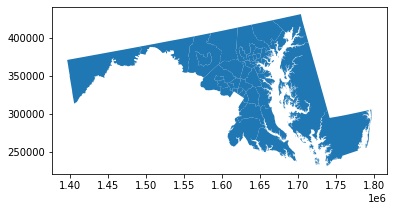

In [12]:
md_puma.plot()

<AxesSubplot:>

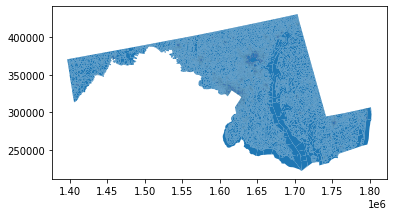

In [13]:
# Ensure that the coordinate reference system is the same
block = block.to_crs(md_puma.crs)
block.plot()

In [10]:
# Find centroid coordinates
md_puma_pt = md_puma.copy()
# Convert from MultiPolygon and Polygon to Point
md_puma_pt.geometry = md_puma_pt.centroid
md_puma_pt.head()

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry
1525,2401500,G24001500,2401500,24,Maryland,01500,St. Mary's & Calvert Counties PUMA,POINT (1667281.125 271370.319)
1526,2401204,G24001204,2401204,24,Maryland,01204,Anne Arundel County (Southeast)--Annapolis Cit...,POINT (1655905.781 325227.654)
1527,2401202,G24001202,2401202,24,Maryland,01202,"Anne Arundel County (North)--Glen Burnie, Pasa...",POINT (1649735.608 357049.408)
1528,2401203,G24001203,2401203,24,Maryland,01203,"Anne Arundel County (Central)--Severna Park, A...",POINT (1658913.175 347812.005)
1529,2401201,G24001201,2401201,24,Maryland,01201,"Anne Arundel County (Northwest)--Severn, Odent...",POINT (1641881.096 345849.220)


<AxesSubplot:>

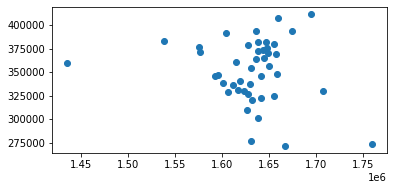

In [11]:
md_puma_pt.plot()